In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', header=0, dtype=float)
print(df)

Th_celsius = np.asarray(df.get('Th'))   # [C]
Tc_celsius = np.asarray(df.get('Tc'))   # [C]
pc_abs = np.asarray(df.get('pc')) + 1.  # [bar] Absolute
ph_abs = np.asarray(df.get('ph')) + 1.  # [bar] Absolute
power = np.asarray(df.get('P'))         # [W]

Th_kelvin = Th_celsius + 273.15         # [K]
Tc_kelvin = Tc_celsius + 273.15         # [K]
pipe_temp_kelvin = np.asarray(df.get('T1')) - np.asarray(df.get('T4')) + 273.15  # [K]

t = df.get('time')  # [min]

    time    Th    Tc    T1    T2    T3    T4   pc    ph      P
0    0.0  26.5  26.8  22.7  25.3  25.0  17.5  3.5   6.6  116.0
1    2.0  28.1  24.0  25.3  34.1  33.5  12.6  3.6   7.5  116.0
2    4.0  31.5  21.9  24.7  37.1  31.7  13.2  3.7   7.9  116.0
3    6.0  34.4  19.1  22.1  40.5  35.3  13.3  3.6   8.6  111.0
4    8.0  37.4  16.6  17.9  43.5  36.8  12.5  3.4   9.2  115.0
5   10.0  39.6  14.7  14.0  45.2  38.3  10.3  3.2   9.9  109.0
6   12.0  41.7  12.9  12.7  46.9  40.1   8.6  2.8  10.4  111.0
7   14.0  43.5  11.0  12.5  48.7  41.8   7.3  2.7  10.8  111.0
8   16.0  45.1   9.5  10.4  50.2  43.0   6.0  2.6  11.4  110.0
9   18.0  46.4   8.1   9.7  51.8  44.3   5.0  2.4  11.6  110.0
10  20.0  47.7   6.7   9.7  53.0  45.1   4.1  2.3  12.0  110.0
11  22.0  48.8   5.6   9.6  54.1  46.1   3.6  2.2  12.2  107.0
12  24.0  49.9   4.7   9.4  55.1  47.0   2.8  2.1  12.8  107.0
13  26.0  50.9   3.7   7.1  56.1  48.1   2.5  2.0  13.0  103.0


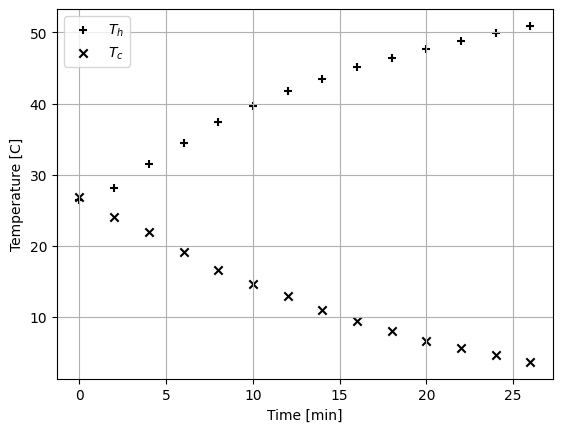

In [3]:
plt.scatter(t, Th_celsius, marker='+', label='$T_h$', c='k')
plt.scatter(t, Tc_celsius, marker='x', label='$T_c$', c='k')
plt.xlabel('Time [min]')
plt.ylabel('Temperature [C]')
plt.legend()
plt.grid()
plt.show()

In [4]:
dt = 2.  # [min]
heat_capacity = 4200.  # [J / (kg K)]
mass = 4.0  # [kg]

efficiency = heat_capacity * mass * np.diff(Th_kelvin) / (power[1:] * 60 * np.diff(t))
efficiency_max = Th_kelvin / (Th_kelvin - Tc_kelvin)

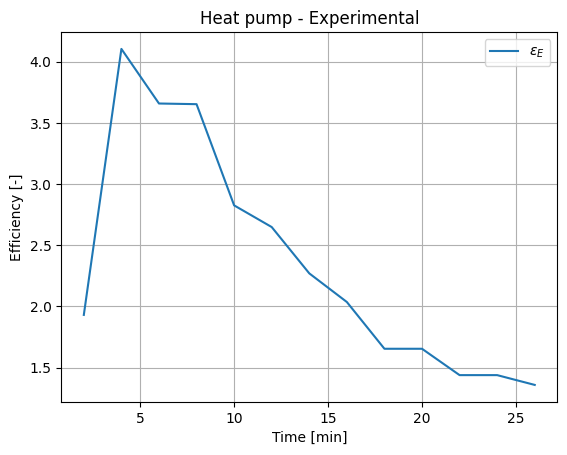

In [5]:
plt.plot(t[1:], efficiency, label=r'$\varepsilon_E$')
plt.xlabel('Time [min]')
plt.ylabel('Efficiency [-]')
plt.title('Heat pump - Experimental')
plt.legend()
plt.grid()
plt.show()

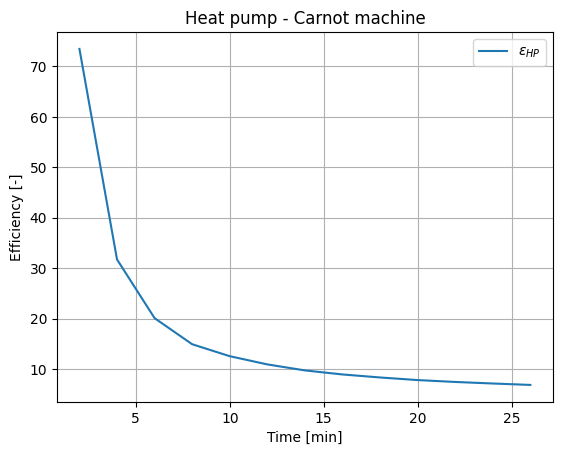

In [6]:
plt.plot(t[1:], efficiency_max[1:], label=r'$\varepsilon_{HP}$')
plt.xlabel('Time [min]')
plt.ylabel('Efficiency [-]')
plt.title('Heat pump - Carnot machine')
plt.legend()
plt.grid()
plt.show()

In [7]:
efficiency_from_graph = (430 - 220) / (430 - 410)
print('At 10 min:')
print(f'Experimental efficiency:         {efficiency[5]:5.2f}')
print(f'Efficienty from log p - H graph: {efficiency_from_graph:5.2f}')
print(f'Carnot machine efficiency:       {efficiency_max[5]:5.2f}')

At 10 min:
Experimental efficiency:          2.65
Efficienty from log p - H graph: 10.50
Carnot machine efficiency:       12.56
